# Task 2 (in-lab assignment no.2) -  
### SF Building permit Dataset


The Building permits dataset (`building_permits.csv`) pertains to all types of structural permits from Jan 1, 2013 - Feb 25th 2018 in San Francisco. Data includes details on application/permit numbers, job addresses, supervisorial districts, and the current status of the applications.

Download the dataset from the link provided and store it in your own data or working folder. Import the dataset in the next cell, and work your way through the steps in the subsequent cells.

1. Import the dataset and observe the first few rows



2. Detect the frequency of missing values as percentage.



3. Check the values of the `Street Number Suffix` and `Zipcode` from the building permits datasets. Both of these contain missing values. Which, if either, of these are missing because they don't exist? Which, if either, are missing because they weren't recorded?



4. Now that you understand why each feature(suffix and zipcode) is missing, choose an appropriate method to deal with theses missing values. 



5. For the feature 'Estimated Cost', impute the missing values uisng multi-variate imputation. That is, impute the estimated cost based on its values in another categorical feature (rather than imputing by the mean/median of all estimated costs). 



6. Create a new dataset at the end with all missing values handled and store as a CSV file.



In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Data

In [237]:
df=pd.read_csv("E:/GUC/Sem 9/(NETW908) Data Engineering/6 - Datasets (Supplementary notes)/building_permits.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

C:\Users\Amora\AppData\Local\Temp\ipykernel_27296\2450784154.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("E:/GUC/Sem 9/(NETW908) Data Engineering/6 - Datasets (Supplementary notes)/building_permits.csv")


In [238]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [239]:
df.shape

(198900, 43)

# Misssing Values

In [241]:
(df.isna().mean() * 100).round(2)

Permit Number                               0.00
Permit Type                                 0.00
Permit Type Definition                      0.00
Permit Creation Date                        0.00
Block                                       0.00
Lot                                         0.00
Street Number                               0.00
Street Number Suffix                       98.89
Street Name                                 0.00
Street Suffix                               1.39
Unit                                       85.18
Unit Suffix                                99.01
Description                                 0.15
Current Status                              0.00
Current Status Date                         0.00
Filed Date                                  0.00
Issued Date                                 7.51
Completed Date                             51.14
First Construction Document Date            7.51
Structural Notification                    96.52
Number of Existing S

 - since the percentage of missing values in Street Number Suffix is 98% it is safe to say that it is does not exist in the data 
 - In case of Zip code only 0.86 % is missing from the whole data so it is easy to conclude that it was not recorded

- Street Number Suffix column can be removed since nearly all of it is missing 
- In case of ZIp code only missing enries will be removed

In [244]:
df_copy=df.drop('Street Number Suffix', axis=1)
df_copy=df_copy.dropna(subset=['Zipcode'])
diff=pd.DataFrame({
    'Old': (df.isna().mean() * 100).round(2),
    'New': (df_copy.isna().mean() * 100).round(2),
}).reindex(df.columns)
diff

,Old,New
Permit Number,0.00,0.00
Permit Type,0.00,0.00
Permit Type Definition,0.00,0.00
Permit Creation Date,0.00,0.00
Block,0.00,0.00
Lot,0.00,0.00
Street Number,0.00,0.00
Street Number Suffix,98.89,NaN
Street Name,0.00,0.00
Street Suffix,1.39,1.38


We can also see that by dropping the nan entries in zip code some other columns got cleaned in the proccess (they were also not recorded same as Zip code)\
these columns were [Supervisor District, Neighborhoods - Analysis Boundaries , Location, Record ID]

## Choosing the right feature to impute by it the estimated cost

C:\Users\Amora\AppData\Local\Temp\ipykernel_27296\2039245675.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Estimated Cost'])


<Axes: xlabel='Estimated Cost', ylabel='Density'>

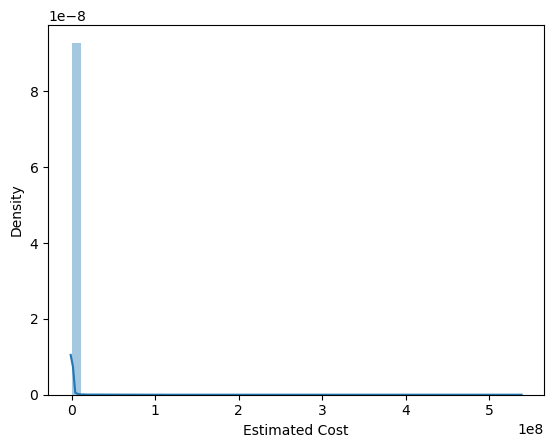

In [247]:
sns.distplot(df_copy['Estimated Cost'])

In [248]:
df_copy.describe(include=object)

,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Street Suffix,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Existing Use,Proposed Use,TIDF Compliance,Existing Construction Type Description,Proposed Construction Type Description,Site Permit,Neighborhoods - Analysis Boundaries,Location
count,197184,197184,197184,197184,197184,197184,194459,1960,196898,197184,197184,197184,182304,96447,182298,6921,35,18619,145962,156684,155405,2,154437,154682,5357,197174,197184
unique,179939,8,1291,4876,1045,1700,21,163,133346,14,1307,1288,1289,1300,1288,1,1,1,2231,93,94,2,5,5,1,41,57591
top,201602179765,otc alterations permit,09/15/2017,3708,001,Market,St,A,street space,complete,09/15/2017,09/15/2017,06/15/2016,10/30/2015,11/07/2016,Y,Y,Y,02/28/2018,1 family dwelling,1 family dwelling,Y,wood frame (5),wood frame (5),Y,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
freq,101,177223,413,1195,9807,5415,136972,346,21791,96333,474,412,339,204,338,6921,35,18619,302,46727,46307,1,112788,113836,5357,21816,554


In [249]:
df_copy['Permit Type Definition'].value_counts()

Permit Type Definition
otc alterations permit                 177223
additions alterations or repairs        14622
sign - erect                             2846
new construction wood frame               950
demolitions                               598
wall or painted sign                      507
new construction                          347
grade or quarry or fill or excavate        91
Name: count, dtype: int64

In [250]:
df_copy['Neighborhoods - Analysis Boundaries'].value_counts()

Neighborhoods - Analysis Boundaries
Financial District/South Beach    21816
Mission                           14681
Sunset/Parkside                   10207
West of Twin Peaks                 8739
Castro/Upper Market                8527
Pacific Heights                    8508
Marina                             8244
Outer Richmond                     7854
Noe Valley                         7844
South of Market                    7572
Bernal Heights                     6067
Nob Hill                           6009
Haight Ashbury                     5798
Inner Sunset                       5776
Bayview Hunters Point              5669
Russian Hill                       5495
Hayes Valley                       5489
Tenderloin                         4783
Inner Richmond                     4458
Potrero Hill                       4293
Presidio Heights                   4084
North Beach                        4054
Western Addition                   3867
Chinatown                          3765
Lone

In [251]:
df_copy[df_copy['Permit Type Definition']=="demolitions"]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
95,201505297543,6,demolitions,05/29/2015,3780,001,502,07th,St,NaN,NaN,"demolish a 2 stories, storage building.",issued,07/19/2017,05/29/2015,07/19/2017,NaN,07/19/2017,NaN,2.0,NaN,NaN,NaN,01/15/2018,20000.0,40000.0,office,0.0,NaN,NaN,2.0,NaN,5.0,wood frame (5),NaN,NaN,NaN,6.0,South of Market,94103.0,"(37.77399389340962, -122.40478807349099)",1383267167552
104,201607273499,6,demolitions,07/27/2016,6580,036,4041,Cesar Chavez,St,NaN,NaN,to demolish 2 stories of 1 family dwelling,complete,01/19/2018,07/27/2016,09/14/2017,01/19/2018,09/14/2017,NaN,2.0,NaN,NaN,NaN,03/14/2018,20000.0,20000.0,1 family dwelling,1.0,NaN,NaN,2.0,NaN,5.0,wood frame (5),NaN,NaN,NaN,8.0,Noe Valley,94131.0,"(37.747266171580726, -122.43013955813504)",1431589462198
136,201706088787,6,demolitions,06/08/2017,3521,005,340,11th,St,NaN,NaN,demolition of a 2-story commercial building wi...,approved,08/22/2017,06/08/2017,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,100000.0,100000.0,retail sales,0.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Mission,94103.0,"(37.771175863006434, -122.41354619526811)",1466170156723
205,201708084155,6,demolitions,08/08/2017,3728,086,1298,Howard,St,NaN,NaN,demolition of restaurant (bldg 1) at gas station.,approved,02/16/2018,08/08/2017,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,45000.0,45000.0,food/beverage hndlng,0.0,NaN,NaN,0.0,NaN,5.0,wood frame (5),NaN,NaN,NaN,6.0,South of Market,94103.0,"(37.77558396346592, -122.413028747729)",1473687359272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197117,201802080778,6,demolitions,02/08/2018,0667,020,1525,Pine,St,NaN,NaN,demolish 1 story commercial restaurant,filed,02/08/2018,02/08/2018,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,25000.0,NaN,food/beverage hndlng,0.0,NaN,NaN,2.0,NaN,5.0,wood frame (5),NaN,NaN,NaN,3.0,Nob Hill,94109.0,"(37.78932105813934, -122.42082638965816)",149647978365
197150,201802080807,6,demolitions,02/08/2018,0076,020,1918,Powell,St,NaN,NaN,demolish private auto garage,filed,02/08/2018,02/08/2018,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,10000.0,NaN,prkng garage/private,0.0,NaN,NaN,2.0,NaN,5.0,wood frame (5),NaN,NaN,NaN,3.0,North Beach,94133.0,"(37.80242483421091, -122.41098479661869)",1496514231040
197673,201802141218,6,demolitions,02/14/2018,6555,019,4250,26th,St,NaN,NaN,"to demolish 3 stories, single family residence.",filed,02/14/2018,02/14/2018,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,15000.0,NaN,1 family dwelling,1.0,NaN,NaN,2.0,NaN,5.0,wood frame (5),NaN,NaN,NaN,8.0,Noe Valley,94114.0,"(37.74826881571773, -122.43497162261305)",1497083207404
198012,201802161494,6,demolitions,02/16/2018,3808,004,188,Hooper,St,0.0,NaN,priority processing. demolition of a one-story...,filed,02/16/2018,02/16/2018,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,120000.0,NaN,school,0.0,NaN,NaN,2.0,NaN,2.0,constr type 2

C:\Users\Amora\AppData\Local\Temp\ipykernel_27296\2800853753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[df_copy['Permit Type Definition']=="demolitions"]['Estimated Cost'])


<Axes: xlabel='Estimated Cost', ylabel='Density'>

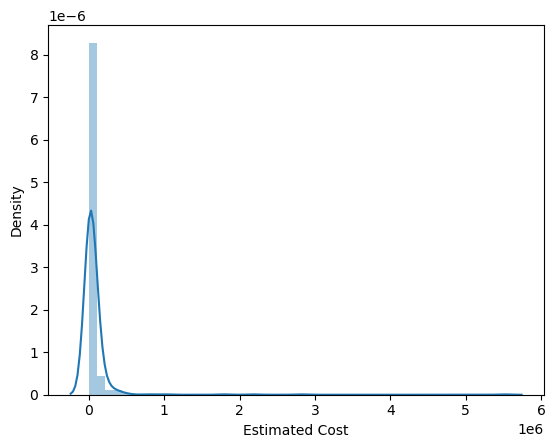

In [252]:
sns.distplot(df_copy[df_copy['Permit Type Definition']=="demolitions"]['Estimated Cost'])

Since there are many outliers so it is better to impute by the median .

In [254]:
df_grouped1=pd.DataFrame({'count':(df_copy.groupby(['Permit Type Definition'])['Estimated Cost'].count())
                          ,'nulls':(df_copy.groupby(['Permit Type Definition'])['Estimated Cost'].apply(lambda x: x.isna().sum()))
                        ,'mean': (df_copy.groupby(['Permit Type Definition'])['Estimated Cost'].mean())
                         ,'median':( df_copy.groupby(['Permit Type Definition'])['Estimated Cost'].median())
                         ,'diff':( (df_copy.groupby(['Permit Type Definition'])['Estimated Cost'].mean())-df_copy.groupby(['Permit Type Definition'])['Estimated Cost'].median())
                         })
df_grouped1

,count,nulls,mean,median,diff
Permit Type Definition,,,,,
additions alterations or repairs,14608,14,4.071679e+05,60000.0,3.471679e+05
demolitions,595,3,6.804991e+04,20000.0,4.804991e+04
grade or quarry or fill or excavate,91,0,6.879636e+05,200000.0,4.879636e+05
new construction,345,2,3.623660e+07,16200000.0,2.003660e+07
new construction wood frame,949,1,1.937475e+06,650000.0,1.287475e+06
otc alterations permit,139794,37429,4.756912e+04,10000.0,3.756912e+04
sign - erect,2839,7,4.735624e+03,3000.0,1.735624e+03
wall or painted sign,504,3,3.487113e+03,800.0,2.687113e+03


In [255]:
gr=df_copy.groupby(['Permit Type Definition'])['Estimated Cost'].transform('median')
gr

0          3000.0
1          3000.0
2         60000.0
3         10000.0
4         20000.0
           ...   
198881    10000.0
198882    10000.0
198883    10000.0
198884    10000.0
198885    10000.0
Name: Estimated Cost, Length: 197184, dtype: float64

In [256]:
df_filled=df_copy.copy()
df_filled['Estimated Cost'].fillna(gr,inplace=True)
df_filled.tail()

C:\Users\Amora\AppData\Local\Temp\ipykernel_27296\543053388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['Estimated Cost'].fillna(gr,inplace=True)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
198881,M893407,8,otc alterations permit,02/23/2018,0018,004,2300,Stockton,St,NaN,NaN,street space & sidewalk repair,issued,02/23/2018,02/23/2018,02/23/2018,NaN,02/23/2018,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,North Beach,94133.0,"(37.80747140583783, -122.41024025753224)",1498338347099
198882,201802232172,8,otc alterations permit,02/23/2018,6021,001B,730,Excelsior,Av,NaN,NaN,to obtain final inspection for work approved u...,issued,02/23/2018,02/23/2018,02/23/2018,NaN,02/23/2018,NaN,2.0,2.0,NaN,NaN,06/23/2018,1.0,1.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Excelsior,94112.0,"(37.723206757170836, -122.42763728105176)",1498339194341
198883,M893427,8,otc alterations permit,02/23/2018,0315,021,377,Geary,St,NaN,NaN,street space,issued,02/23/2018,02/23/2018,02/23/2018,NaN,02/23/2018,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78696971667916, -122.40936701144197)",149834069380
198884,M893447,8,otc alterations permit,02/23/2018,3504,030,1699,Market,St,NaN,NaN,street space,filed,02/23/2018,02/23/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Mission,94103.0,"(37.77217130976155, -122.42193576313322)",1498341156230
198885,201802232173,8,otc alterations permit,02/23/2018,2150,001A,2007,30th,Av,NaN,NaN,revision to pa 2017-1128-4886 - reconfigure 2n...,filed,02/23/2018,02/23/2018,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,5000.0,0.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94116.0,"(37.74976582284573, -122.48824447038214)",1498342127659


C:\Users\Amora\AppData\Local\Temp\ipykernel_27296\3556053651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filled['Estimated Cost'])


<Axes: xlabel='Estimated Cost', ylabel='Density'>

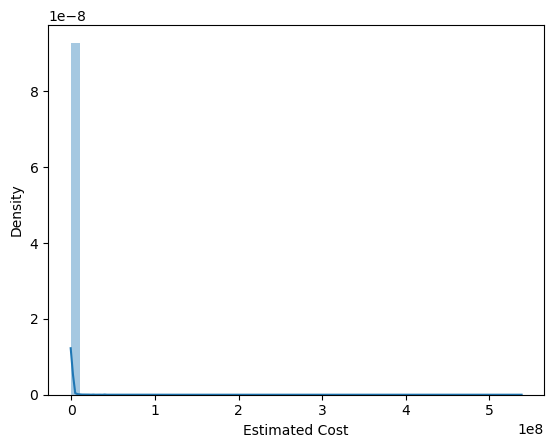

In [257]:
sns.distplot(df_filled['Estimated Cost'])

In [258]:
diff=pd.DataFrame({
    'Old': (df_copy.isna().mean() * 100).round(2),
    'New': (df_filled.isna().mean() * 100).round(2),
}).reindex(df.columns)
diff

,Old,New
Permit Number,0.00,0.00
Permit Type,0.00,0.00
Permit Type Definition,0.00,0.00
Permit Creation Date,0.00,0.00
Block,0.00,0.00
Lot,0.00,0.00
Street Number,0.00,0.00
Street Number Suffix,NaN,NaN
Street Name,0.00,0.00
Street Suffix,1.38,1.38


We can also further remove the columns which are almost all missing values like [Unit Suffix ,Voluntary Soft-Story Retrofit, TIDF Compliance, Site Permit, Structural Notification ]

In [260]:
df_final=df_filled.drop(['Unit Suffix' ,'Voluntary Soft-Story Retrofit', 'TIDF Compliance', 'Site Permit','Structural Notification'], axis=1).reset_index()
df_final

,index,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,6.0,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,0.0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,7.0,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,6.0,6.0,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,0.0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,2.0,2.0,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,3.0,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197179,198881,M893407,8,otc alterations permit,02/23/2018,0018,004,2300,Stockton,St,NaN,street space & sidewalk repair,issued,02/23/2018,02/23/2018,02/23/2018,NaN,02/23/2018,NaN,NaN,NaN,NaN,10000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,North Beach,94133.0,"(37.80747140583783, -122.41024025753224)",1498338347099
197180,198882,201802232172,8,otc alterations permit,02/23/2018,6021,001B,730,Excelsior,Av,NaN,to obtain final inspection for work approved u...,issued,02/23/2018,02/23/2018,02/23/2018,NaN,02/23/2018,2.0,2.0,NaN,06/23/2018,1.0,1.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),11.0,Excelsior,94112.0,"(37.723206757170836, -122.42763728105176)",1498339194341
197181,198883,M893427,8,otc alterations permit,02/23/2018,0315,021,377,Geary,St,NaN,street space,issued,02/23/2018,02/23/2018,02/23/2018,NaN,02/23/2018,NaN,NaN,NaN,NaN,10000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78696971667916, -122.40936701144197)",149834069380
197182,198884,M893447,8,otc alterations permit,02/23/2018,3504,030,1699,Market,St,NaN,street space,filed,02/23/2018,02/23/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Mission,94103.0,"(37.77217130976155, -122.42193576313322)",1498341156230


In [261]:
(df_final.isna().mean() * 100).round(2)

index                                      0.00
Permit Number                              0.00
Permit Type                                0.00
Permit Type Definition                     0.00
Permit Creation Date                       0.00
Block                                      0.00
Lot                                        0.00
Street Number                              0.00
Street Name                                0.00
Street Suffix                              1.38
Unit                                      85.09
Description                                0.15
Current Status                             0.00
Current Status Date                        0.00
Filed Date                                 0.00
Issued Date                                7.55
Completed Date                            51.09
First Construction Document Date           7.55
Number of Existing Stories                21.38
Number of Proposed Stories                21.41
Fire Only Permit                        

In [262]:
df_final.to_csv("E:/GUC/Sem 9/(NETW908) Data Engineering/Week 3/final.csv",index=False)

In [263]:
df_grouped2=pd.DataFrame({'count':(df_copy.groupby(['Permit Type Definition','Existing Construction Type Description'])['Estimated Cost'].count())
                        ,'mean': (df_copy.groupby(['Permit Type Definition','Existing Construction Type Description'])['Estimated Cost'].mean())
                         ,'median':( df_copy.groupby(['Permit Type Definition','Existing Construction Type Description'])['Estimated Cost'].median())
                         ,'diff':( (df_copy.groupby(['Permit Type Definition','Existing Construction Type Description'])['Estimated Cost'].mean())-df_copy.groupby(['Permit Type Definition','Existing Construction Type Description'])['Estimated Cost'].median())
                        })
df_grouped2

count  \
Permit Type Definition           Existing Construction Type Description           
additions alterations or repairs constr type 1                             1557   
                                 constr type 2                              340   
                                 constr type 3                              983   
                                 constr type 4                               31   
                                 wood frame (5)                           10965   
demolitions                      constr type 1                               57   
                                 constr type 2                               22   
                                 constr type 3                               54   
                                 constr type 4                                3   
                                 wood frame (5)                             454   
new construction wood frame      wood frame (5)                               1   
otc alterations permit           constr type 1                            24851   
                                 constr type 2                             3306   
                                 constr type 3                             8083   
                                 constr type 4                              331   
                                 wood frame (5)                          100429   
sign - erect                     constr type 1                             1140   
                                 constr type 2                              358   
                                 constr type 3                              491   
                                 constr type 4                               13   
                                 wood frame (5)                             801   
wall or painted sign             constr type 3                                3   

                                                                                 mean  \
Permit Type Definition           Existing Construction Type Description                 
additions alterations or repairs constr type 1                           1.328102e+06   
                                 constr type 2                           7.259106e+05   
                                 constr type 3                           3.723147e+05   
                                 constr type 4                           3.179055e+04   
                                 wood frame (5)                          2.420191e+05   
demolitions                      constr type 1                           2.768962e+05   
                                 constr type 2                           7.288182e+04   
                                 constr type 3                           6.674074e+04   
                                 constr type 4                           2.383333e+05   
                                 wood frame (5)                          3.510180e+04   
new construction wood frame      wood frame (5)                          2.800000e+04   
otc alterations permit           constr type 1                           1.291631e+05   
                                 constr type 2                           8.076209e+04   
                                 constr type 3                           5.613024e+04   
                                 constr type 4                           6.971670e+04   
                                 wood frame (5)                          2.455472e+04   
sign - erect                     constr type 1                           5.781235e+03   
                                 constr type 2                           3.971134e+03   
                                 constr type 3                           5.052362e+03   
                                 constr type 4                           4.369231e+03   
                                 wood frame (5)                          3.422753e+03   
wall or painted sign             c